In [1]:
from __future__ import annotations
from cart import *
import pandas as pd

#d = dict(features, **n_features)  #merges the two dicts
#df = pd.DataFrame(data=d)         #creates the dataframe
import time
import csv

df=pd.read_csv('Carseats_train.csv')
df=df.iloc[:,1:]
features_names=list(df.columns)
colonne=features_names[:6]
features_name=features_names[7:9]
features_names=colonne + features_name

n_features_names=list(df.columns)
columns = [(n_features_names[6])]
n_features_name = n_features_names[9:11]
n_features_names=columns + n_features_name
features=df.iloc[:,0:6]
features2=df.iloc[:,7:9]
features=dict(features)
features2=dict(features2)
n_features=df.iloc[:,6:7]
n_features2=df.iloc[:,9:11]
n_features=dict(n_features)
n_features2=dict(n_features2)
features = dict(features, **features2)
n_features = dict(n_features, **n_features2)

High=[]
for i in features['Sales']:
    if i < 8:
        High.append('NO')
    else:
        High.append('YES')

High=pd.DataFrame(High)
High=dict(High)
High['High'] = High.pop(0)
y=High['High']
exclude_keys = ['Sales']

new_d = {k: features[k] for k in set(list(features.keys())) - set(exclude_keys)}
features=new_d
features_names=features_names[1:]
indici = np.arange(0, len(y))

###############Prepating Test Set############################################### 
df_test=pd.read_csv('Carseats_test.csv')
df_test=df_test.iloc[:,1:]
features_test=df_test.iloc[:,0:6]
features2_test=df_test.iloc[:,7:9]
features_test=dict(features_test)
features2_test=dict(features2_test)
n_features_test=df_test.iloc[:,6:7]
n_features2_test=df_test.iloc[:,9:11]
n_features_test=dict(n_features_test)
n_features2_test=dict(n_features2_test)
features_test = dict(features_test, **features2_test)
n_features_test = dict(n_features_test, **n_features2_test)

High=[]
for i in features_test['Sales']:
    if i < 8:
        High.append('NO')
    else:
        High.append('YES')

High=pd.DataFrame(High)
High=dict(High)
High['High'] = High.pop(0)
y_test=High['High']
y_test = y_test.tolist()
del features_test["Sales"]   

###########################################################################

#when definining a funcion please be aware we are using purity gain or information gain or greatest difference between variance, all positive aspects 
#adding user_defined as a possible impurity_fn and added user_impur to carry that function 
#user_fn is only defined for the growing stage at this point 

def user_fn(self, node): #impur just takes node in CART
    #example gini
    prom = 0
    c = Counter(self.y[node.indexes]) #Creates a dictionary {"yes":number, "no"}
    c = list(c.items())
    for i in  c:
        prob_i = float((i[1]/len(self.y[node.indexes])))**2 #probability squared
                    
        prom += prob_i*i[1] #original weighted, only looking at purity
                    
    return prom   



implemented print for classifier trees thus far, 
when running classifier have a lower min_imp_gaiin

In [2]:
lbt = False

if lbt:
    #for use with latent budget tree for carseat 

    #min(features["Price"]), max(features["Price"])
    features["Price"].loc[features["Price"]<50] = 1
    features["Price"].loc[features["Price"].between(50,100)] = 2
    features["Price"].loc[features["Price"].between(100,150)] = 3
    features["Price"].loc[features["Price"]>=150] = 4
    features["Price"] = "Price" + features["Price"].astype(str)

    features["Population"].loc[features["Population"]<100] = 1
    features["Population"].loc[features["Population"].between(100,200)] = 2
    features["Population"].loc[features["Population"].between(200,300)] = 3
    features["Population"].loc[features["Population"].between(300,400)] = 4
    features["Population"].loc[features["Population"]>=400] = 5
    features["Population"] = "Population" + features["Population"].astype(str)

    features["CompPrice"].loc[features["CompPrice"]<100] = 1
    features["CompPrice"].loc[features["CompPrice"].between(100,125)] = 2
    features["CompPrice"].loc[features["CompPrice"].between(125,150)] = 3
    features["CompPrice"].loc[features["CompPrice"]>=150] = 4
    features["CompPrice"] = "CompPrice" + features["CompPrice"].astype(str)

    #features["Sales"] = round(features["Sales"])
    #features["Sales"] = "Sales" + features["Sales"].astype(str)

    features["Age"].loc[features["Age"]<35] = 1
    features["Age"].loc[features["Age"].between(35,45)] = 2
    features["Age"].loc[features["Age"].between(45,55)] = 3
    features["Age"].loc[features["Age"].between(55,65)] = 4
    features["Age"].loc[features["Age"]>=65] = 5
    features["Age"] = "Age" + features["Age"].astype(str)

    features["Advertising"] = "Advertising" + features["Advertising"].astype(str)

    features["Education"] = "Education" + features["Education"].astype(str)

    features["Income"].loc[features["Income"]<40] = 1
    features["Income"].loc[features["Income"].between(40,60)] = 2
    features["Income"].loc[features["Income"].between(60,80)] = 3
    features["Income"].loc[features["Income"].between(80,100)] = 4
    features["Income"].loc[features["Income"]>=100] = 5
    features["Income"] = "Income" + features["Income"].astype(str)


    for f in features:
        print(f)
        n_features[f] = features[f]

    n_features_names = n_features_names + features_names

    features_names = []
    features = []
    

In [3]:

my_tree = MyNodeClass('n1', indici) 
cart = CART(y,features,features_names,n_features,n_features_names,impurity_fn = "tau",problem="classifier", min_cases_parent= 10,min_cases_child= 5, method = "FAST", twoing = False,max_level = 4, min_imp_gain = 0.0001)
cart.growing_tree(my_tree, max_k =2)
##can print single tree 


#alpha = cart.pruning(features_test, n_features_test, y_test)
#cart.print_alpha(alpha) prints the alpha values


Split Found:  n1 [['ShelveLoc', ('Medium', 'Bad'), 0.15303824308127323, 0]] start
node_proportion_total  0.0732358265806532
Split Found:  n2 [['Price', 120, 0.1835695169028498, 1]] left
node_proportion_total  0.3472524878081309
Node_proportion_gain  0.2740166612274777
Split Found:  n4 [['Income', 32, 0.16923076923077185, 2]] left
node_proportion_total  0.3803668507389402
Node_proportion_gain  0.03311436293080933
Node Search Split Error for:  n8 with obs in node:  5  which is less than minimum parent size:  10
TypeError
This split isn't good now i cut it [counter] - node class purity
TypeError
Split Found:  n5 [['Income', 35, 0.38095238095238076, 2]] right
node_proportion_total  0.40335169618508204
Node_proportion_gain  0.02298484544614182
This split isn't good now i cut it [counter] - node class purity
TypeError
Split Found:  n11 [['Education', 15, 0.2343750000000005, 3]] right
node_proportion_total  0.41694699171886096
Node_proportion_gain  0.013595295533778917
Split Found:  n22 [['Ad

(((None, None), (None, ((None, None), None))),
 (((None, None), (None, None)),
  (((None, None), (None, None)), ((None, None), (None, None)))))

In [4]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth', 3000)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

cart.print_tree(table = True, html = True).style.hide_index() #print both the pruned and non pruned tree 


Node,Node_type,Variable_Split,n,Impurity_Value,Class/Value
n1,Parent,"ShelveLoc in ('Medium', 'Bad')",280,0.150000,NO
n2,Parent,Price>120,53,0.180000,YES
n4,Parent,Income>32,27,0.170000,YES
n8,Child,None,5,None,YES
n9,Child,None,22,None,YES
n5,Parent,Income>35,26,0.380000,YES
n10,Child,None,5,None,NO
n11,Parent,Education>15,21,0.230000,YES
n23,Child,None,9,None,YES
n22,Parent,Advertising>5,12,0.260000,YES


{leaves : misclassification count} =  {18: 35, 17: 35, 16: 35, 15: 35, 14: 35, 12: 36, 10: 36, 8: 38, 6: 35, 3: 34, 2: 37}
Best tree for test set has 3 leaves with misclassification count 34 


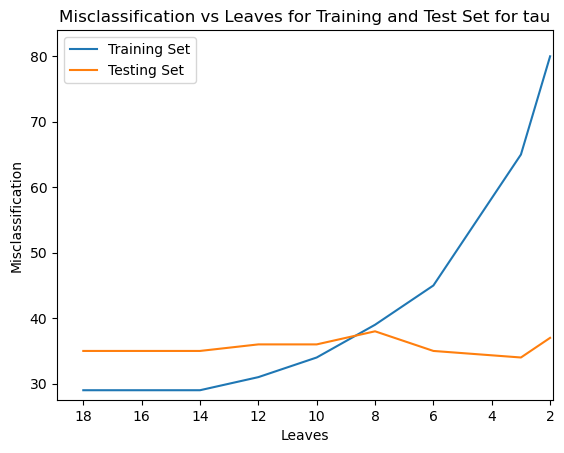

Node,Node_type,Variable_Split,n,Impurity_Value,Class/Value
n1,Parent,"ShelveLoc in ('Medium', 'Bad')",280,0.150000,NO
n2,Child,Price>120,53,None,YES
n2,Parent,Price>120,53,0.180000,YES
n3,Parent,Price>92,227,0.140000,NO
n6,Child,Age>64,33,None,YES
n7,Child,Advertising>8,194,None,NO
n6,Parent,Age>64,33,0.330000,YES
n7,Parent,Advertising>8,194,0.110000,NO


In [5]:
alpha, pruned_table = cart.pruning(features_test, n_features_test, y_test)
pruned_table.style.hide_index()

#alpha = cart.pruning(features_test, n_features_test, y_test)
